In [64]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

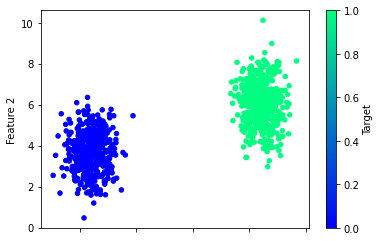

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot(x="Feature 1", y="Feature 2", c="Target", colormap="winter", kind="scatter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5880
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6533
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6987
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6329 - accuracy: 0.7627
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.8093
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.8720
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.8987
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.9440
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.9627
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.9773
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0873 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 1.0000
Epoch 92/100


In [17]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))
history_df.head()

,loss,accuracy
1,0.680208,0.588000
2,0.665924,0.653333
3,0.650846,0.698667
4,0.632927,0.762667
5,0.612154,0.809333


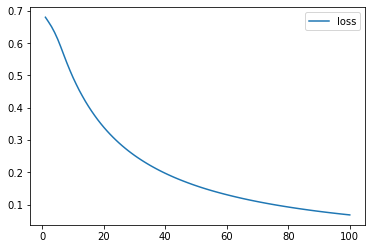

In [18]:
# Plot the loss.
history_df.plot(y="loss")

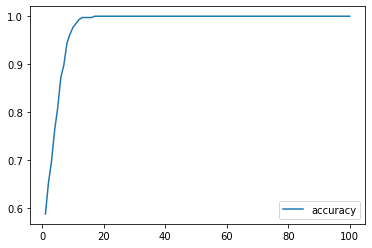

In [19]:
# Plot the loss.
history_df.plot(y="accuracy")

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss:.3}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0709 - accuracy: 1.0000
Loss: 0.0709, Accuracy: 1.0


In [34]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=50, centers=1, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")
model2loss, model2accuracy = nn_model.evaluate(new_X, new_Y, verbose=2)

2/2 - 0s - loss: 2.9115e-12 - accuracy: 1.0000


# Non-linear data test

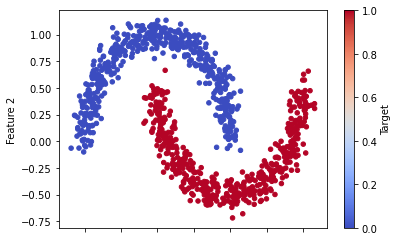

In [61]:
from sklearn.datasets import make_moons

# Create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating DF to plot
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot(x="Feature 1", y="Feature 2", c="Target", colormap="coolwarm", kind="scatter")

In [67]:
# Create training and testing sets
X_moontrain, X_moontest, y_moontrain, y_moontest = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moonscaler = StandardScaler()

# Fit the scaler
X_moonscaler.fit(X_moontrain)

# Scale the data
X_moontrain_scaled = X_moonscaler.transform(X_moontrain)
X_moontest_scaled = X_moonscaler.transform(X_moontest)

In [69]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moontrain_scaled, y_moontrain, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7534 - accuracy: 0.6293
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6533
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5893 - accuracy: 0.6800
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5418 - accuracy: 0.6907
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5056 - accuracy: 0.7133
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7240
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4534 - accuracy: 0.7493
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.7573
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4160 - accuracy: 0.7733
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.7813
Epoch 11/

24/24 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2562 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2561 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2560 - accuracy: 0.8920: 0s - loss: 0.2372 - accuracy: 0.90
Epoch 88/100
24/24 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.89 - 0s 5ms/step - loss: 0.2559 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2558 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2556 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.8920
Epoch 92/100
24/24 [===============

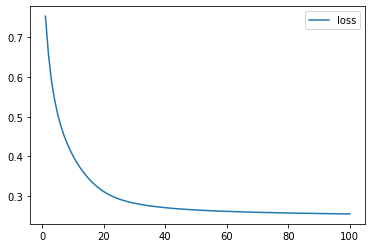

In [70]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

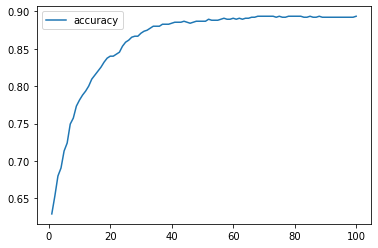

In [71]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [72]:
# Generate our new Sequential model - creating a new model to test multiple inputs
new_model = tf.keras.models.Sequential()

In [73]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))